<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


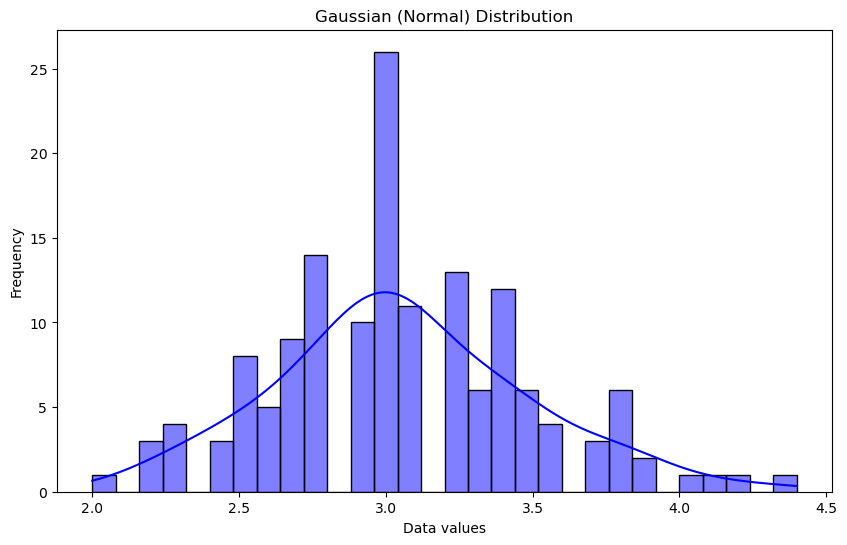

/home/mr-arthor/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


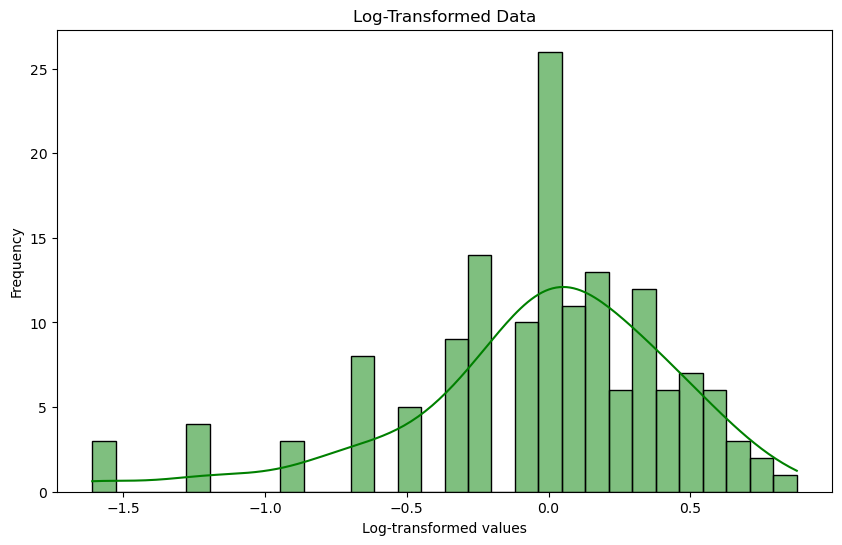

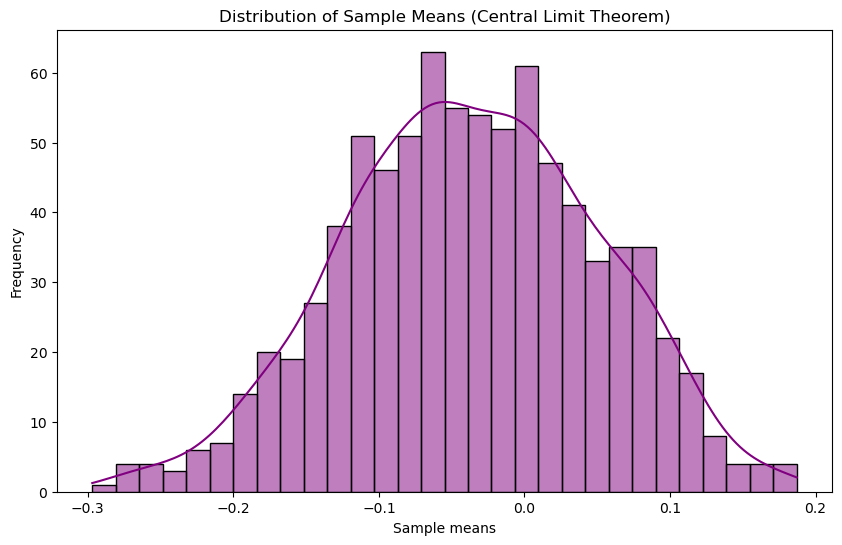

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
# Generate a Gaussian-distributed dataset
iris_df.info()


# Visualize the Gaussian distribution
plt.figure(figsize=(10, 6))
data = iris_df['sepal width (cm)']
sns.histplot(data, kde=True, color="blue", bins=30)

plt.title("Gaussian (Normal) Distribution")
plt.xlabel("Data values")
plt.ylabel("Frequency")
plt.show()



log_data = np.log(data- min (data))

# Visualize the log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(log_data, kde=True, color="green", bins=30)
plt.title("Log-Transformed Data")
plt.xlabel("Log-transformed values")
plt.ylabel("Frequency")
plt.show()



## Applying Central Limit Theorem (CLT)

# Applying Central Limit Theorem
sample_means = [np.mean(np.random.choice(log_data, size=30)) for _ in range(1000)]

# Visualize the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color="purple", bins=30)
plt.title("Distribution of Sample Means (Central Limit Theorem)")
plt.xlabel("Sample means")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency (log scale)')

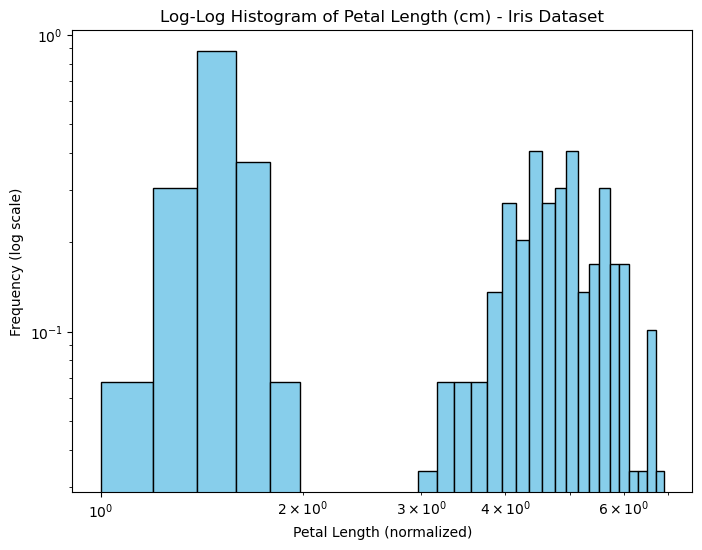

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Choose a feature, e.g., petal length
data = df['petal length (cm)']

# Normalize the data to fit within a range
data_normalized = data

# Plot histogram on a log-log scale
plt.figure(figsize=(8, 6))
plt.hist(data_normalized, bins=30, density=True, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.xscale('log')
plt.title("Log-Log Histogram of Petal Length (cm) - Iris Dataset")
plt.xlabel("Petal Length (normalized)")
plt.ylabel("Frequency (log scale)")

Text(0, 0.5, 'Frequency')

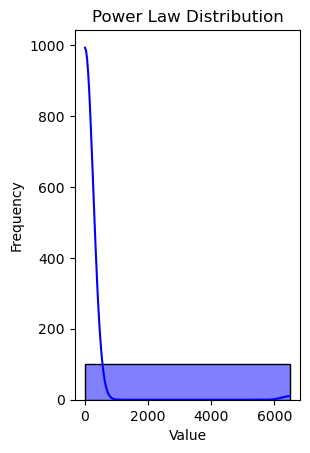

In [15]:
# Fit a power-law distribution
param = powerlaw.fit(data_normalized)
x = np.linspace(data_normalized.min(), data_normalized.max(), 100)
pdf_fitted = powerlaw.pdf(x, *param)

# Plot the fitted power-law distribution
plt.subplot(1, 2, 1)
sns.histplot(pdf_fitted, bins=1, kde=True, color='blue')
plt.title('Power Law Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')